In [41]:
reset -fs

In [42]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler #Z-score variables
#from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

%matplotlib inline

In [43]:
bk = pd.read_csv("./burger-king-items.txt",sep='\t')
bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


출처 : 버거킹 데이터  
  
https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Data/burger-king-items.txt  

## 1. 이변량 데이터

칼로리와 나트륨을 feature로 잡고 실험진행

In [44]:
features = ["Calories", "Sodium(mg)"]

x = bk[features]
x[features] = StandardScaler().fit_transform(x)
EM = GaussianMixture(n_components = 3).fit(x)

cluster = EM.predict(x)

In [45]:
cluster

array([0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [46]:
cluster_p = EM.predict_proba(x)
cluster_p

array([[5.11406095e-01, 1.10311699e-02, 4.77562735e-01],
       [9.65884230e-01, 2.80562298e-02, 6.05954038e-03],
       [4.44546298e-01, 1.25961075e-02, 5.42857595e-01],
       [9.13712760e-01, 8.62143744e-02, 7.28656618e-05],
       [9.22741506e-01, 4.57691291e-02, 3.14893645e-02],
       [7.72129066e-01, 2.00239094e-02, 2.07847025e-01],
       [9.66509085e-01, 3.30972354e-02, 3.93679248e-04],
       [7.66206544e-01, 2.33793252e-01, 2.04361988e-07],
       [4.58848274e-01, 5.40877263e-01, 2.74462661e-04],
       [9.40048502e-04, 9.99059943e-01, 8.39906850e-09],
       [3.73260747e-08, 9.99999963e-01, 1.47982329e-14],
       [3.81557825e-23, 1.00000000e+00, 2.83397701e-10],
       [6.67220835e-03, 9.82864147e-01, 1.04636451e-02],
       [2.14644792e-03, 9.97826889e-01, 2.66631735e-05],
       [3.97184294e-10, 9.99536426e-01, 4.63574010e-04],
       [3.94117010e-11, 9.99980287e-01, 1.97125942e-05],
       [5.65053923e-21, 9.99999928e-01, 7.16885143e-08],
       [1.07273873e-07, 9.99999

In [47]:
print("SILHOUETTE", silhouette_score(x, cluster))

SILHOUETTE 0.357211963389611


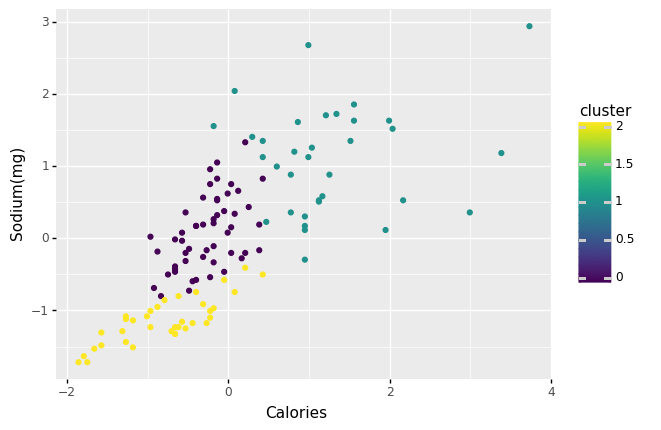

<ggplot: (81449645379)>

In [48]:
x["cluster"] = cluster

(ggplot(x, aes(x = "Calories", y="Sodium(mg)", color="cluster")) + geom_point())

# Multiple Dimensions

In [26]:
features = ["Sugar(g)","Protein(g)", "Fat(g)"]

In [31]:
x = bk[features]

z = StandardScaler()

x[features] = z.fit_transform(x)

In [32]:
EM = GaussianMixture(n_components = 3)
EM.fit(x)

GaussianMixture(n_components=3)

In [34]:
cluster = EM.predict(x)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [35]:
silhouette_score(x, cluster)

0.41269446652563374

In [36]:
EM.predict_proba(x)

array([[6.61610659e-023, 9.99999415e-001, 5.85130020e-007],
       [9.54619426e-019, 9.99999998e-001, 2.08090892e-009],
       [8.26491593e-024, 1.00000000e+000, 5.65851237e-017],
       [1.10138989e-010, 1.00000000e+000, 4.07225869e-021],
       [1.54584050e-016, 1.00000000e+000, 5.71032883e-019],
       [2.28985615e-017, 9.99999739e-001, 2.60794614e-007],
       [3.23093253e-018, 1.00000000e+000, 1.78783299e-011],
       [2.94114465e-014, 1.00000000e+000, 1.86268166e-029],
       [2.45979727e-002, 9.75402027e-001, 7.97298032e-025],
       [8.53743710e-001, 1.46256290e-001, 4.75716633e-051],
       [9.98891720e-001, 1.10827980e-003, 1.44028577e-095],
       [9.99997573e-001, 2.42696410e-006, 3.48854951e-138],
       [5.79067452e-001, 4.20932548e-001, 3.88876052e-018],
       [5.16467876e-001, 4.83532124e-001, 7.84132485e-021],
       [9.70230232e-001, 2.97697682e-002, 2.05227689e-058],
       [9.89404706e-001, 1.05952940e-002, 3.90622426e-066],
       [9.99989440e-001, 1.05599883e-005

In [37]:
x["cluster"] = cluster

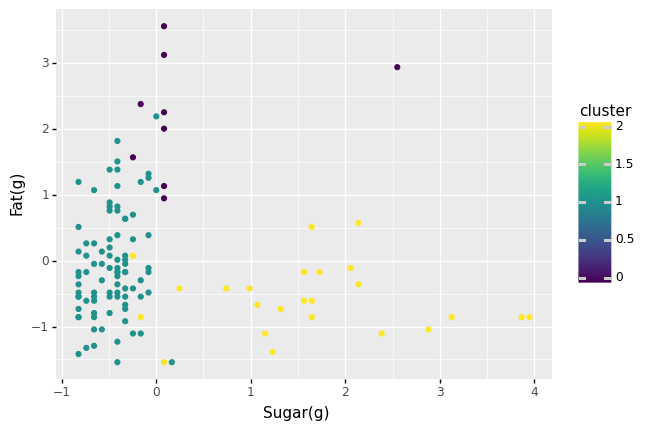

<ggplot: (81449572723)>

In [38]:
(ggplot(x, aes(x = "Sugar(g)", y = "Fat(g)", color = "cluster")) + geom_point())

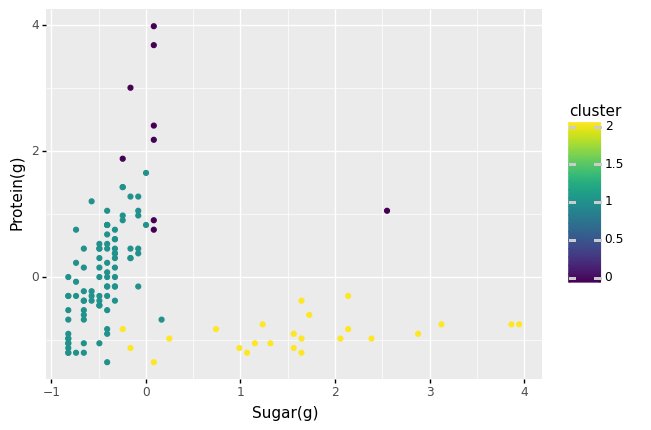

<ggplot: (81449612882)>

In [39]:
(ggplot(x, aes(x = "Sugar(g)", y ="Protein(g)", color = "cluster")) + geom_point())

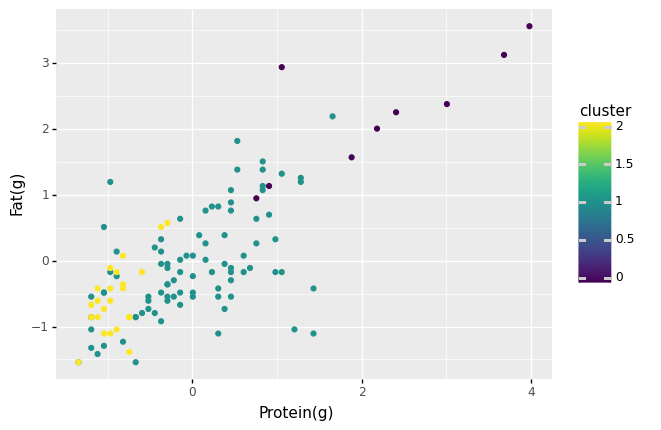

<ggplot: (81449648372)>

In [40]:
(ggplot(x, aes(x = "Protein(g)", y ="Fat(g)", color = "cluster")) + geom_point())